## Swap-Test Operator 

In [1]:
from qiskit import *
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

### Quantum Circuit 

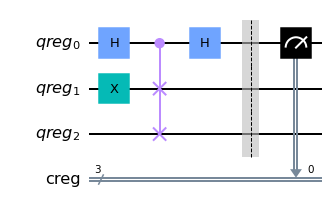

In [2]:
qreg = QuantumRegister(3, 'qreg')
creg = ClassicalRegister(3, 'creg')
qc = QuantumCircuit (qreg, creg)


# Initial state |01>
qc.x(qreg[1])

#swap_test
qc.h(qreg[0]) #Apply superposition on the ancilla qubit 
qc.cswap( qreg[0], qreg[1], qreg[2] )
qc.h(qreg[0])

qc.barrier()
qc.measure(qreg[0], creg[0])

display(qc.draw(output="mpl"))

In [3]:
#Result 
shots = 1024
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shots)
job_result = job.result()
counts = job_result.get_counts(qc)
print(counts)

{'001': 493, '000': 531}


In [4]:
# The results agree with the swap test function, where if the P|0> = 0.5 on the ancilla(control) qubit 
#means the states are orthogonal, and if the P|0>=1 indicates the states are identical. 